# Analysing Marketing Campaigns with Python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Configuration for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-whitegrid')


# Chapter 2: Exploratory Analysis & Summary Statistics

In [4]:
dfdc = pd.read_csv('C:/Users/UserPC/.conda/3rd Python/Datacamp learning/marketing_new.csv')

# Data loaded successfully print successful statement
if dfdc.empty:
    print("Data loading failed.")
else:
    # Check for missing values
    # missing_values = df.isnull().sum()
    # if missing_values.any():
    #    print("Missing values found in the dataset:")
    #    print(missing_values[missing_values > 0])
    #else:
#print("No missing values found in the dataset.")
    print("Data loaded successfully.")




Data loaded successfully.


In [5]:
marketing = dfdc.copy()

# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']== True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers / total
print(round(conversion_rate*100, 2), "%")

14.09 %


In [6]:
marketing1 = dfdc.copy()

# Calculate the number of subscribers
total_subscribers = marketing1[marketing1['converted']== True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing1[marketing1['is_retained']== True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained / total_subscribers

print("total subscribers:", total_subscribers)
print("retained:", retained)
print(round(retention_rate*100, 2), "%")



total subscribers: 1030
retained: 6967
676.41 %


- Retention Rate: This measures the percentage of users who remain subscribed after a certain period. To calculate it, you:

- 1. Count the number of subscribers using the user_id and converted columns.
- 2. Count the number of retained subscribers using the is_retained column.
- 3. Divide the number of retained subscribers by the total number of initial subscribers.

These metrics are crucial for understanding both immediate and long-term campaign effectiveness.

The goal of the next lesson is to explore how to use customer segmentation to improve marketing strategies by analyzing different customer groups and their responses.

In [7]:
marketing1



,Unnamed: 0,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
1,1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
2,2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
3,3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
4,4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,2.0,4.0,Yes
10033,10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaN,Email,True,2.0,4.0,Yes
10034,10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaN,Email,True,2.0,4.0,Yes
10035,10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaN,Email,True,2.0,4.0,Yes


In [8]:
# Native version

# Isolate English speakers
english_speakers = marketing1[marketing1['language_displayed'] == 'English']

# Calculate the total number of English speakers
total = english_speakers['user_id'].nunique() 

# Calculate the number of English speakers who converted
converted = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = converted / total

print("The conversion rate for English speakers is", round(conversion_rate * 100, 2), '%')




The conversion rate for English speakers is 13.13 %


In [9]:
# Datacamp version
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 13.13 %


## Language Conversion Rate

In [10]:
# Group by language_displayed and count unique users
total = marketing1.groupby('language_displayed').nunique()['user_id']

# Group by language_displayed and count unique conversions
subscribers = marketing1[marketing1['converted'] == True].groupby('language_displayed').nunique()['user_id']

# Calculate the conversion rate for all languages
language_conversion_rate = round((subscribers/total)*100, 2)
print(language_conversion_rate)

language_displayed
Arabic     50.00
English    13.13
German     71.62
Spanish    20.00
Name: user_id, dtype: float64


In [11]:
# Group by language_displayed and count unique users
total = marketing1.groupby('language_displayed').nunique()['user_id']



total

language_displayed
Arabic       24
English    7169
German       74
Spanish     120
Name: user_id, dtype: int64

In [12]:
subscribers = marketing1[marketing1['converted'] == True].groupby('language_displayed').nunique()['user_id']



subscribers

language_displayed
Arabic      12
English    941
German      53
Spanish     24
Name: user_id, dtype: int64

## Visualising Language Conversion Rate

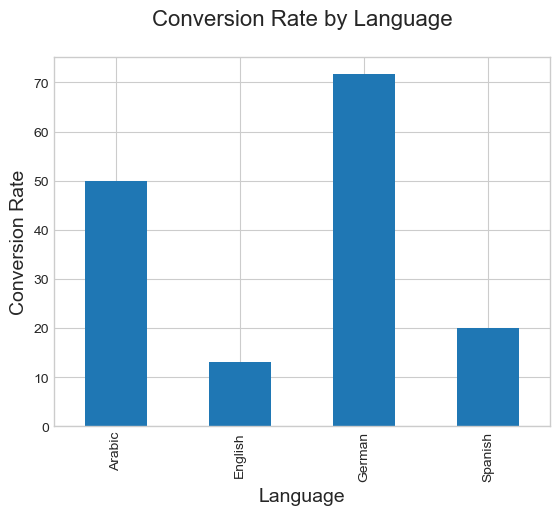

In [13]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion Rate by Language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion Rate', size = 14)

# Display the plot
plt.show()

## Creating daily conversion rate DataFrame


In [14]:
# Group by date_served and count unique users
total = marketing1.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing1[marketing1['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

## Setting up our data to visualize daily conversion


In [15]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                              'conversion_rate']

## Visualize daily conversion rate


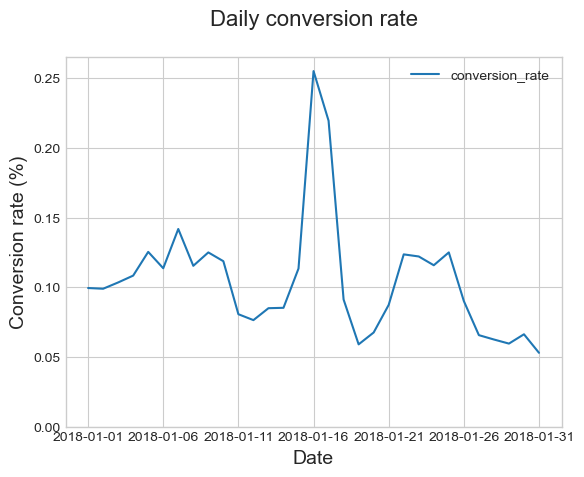

In [16]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served', 'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

# Plotting Campaign Results

### Marketing channels across age groups


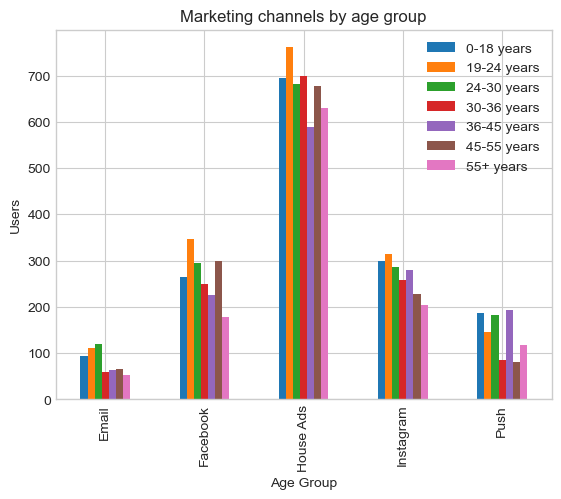

In [17]:
channel_age = marketing1.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

### Grouping and counting by multiple columns


In [18]:
# Count the subs by subscribing channel and day
retention_total = marketing1.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

# Print results
display(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64

In [19]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing1[marketing1['is_retained'] == True].groupby(['date_subscribed', 
                                       'subscribing_channel'])['user_id'].nunique()

# Print results
display(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64

## Analyzing retention rates for the campaign

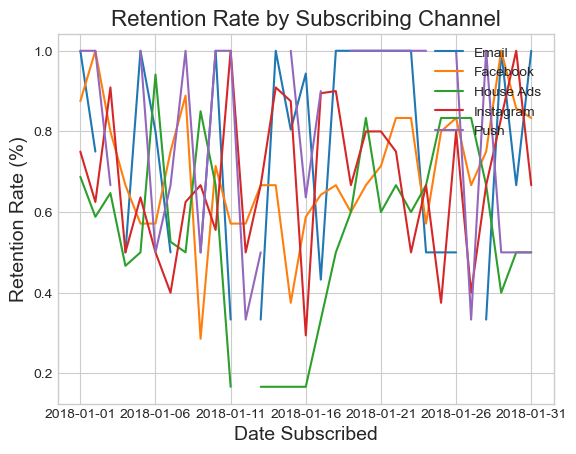

In [20]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel', size = 16)
plt.xlabel('Date Subscribed', size = 14)
plt.ylabel('Retention Rate (%)', size = 14)
plt.legend(loc='upper right', labels=retention_rate_df.columns.values)
plt.show()

# Chapter 3: Conversion Attribution

### Building a conversion function


In [21]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

### Test and visualize conversion function


date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


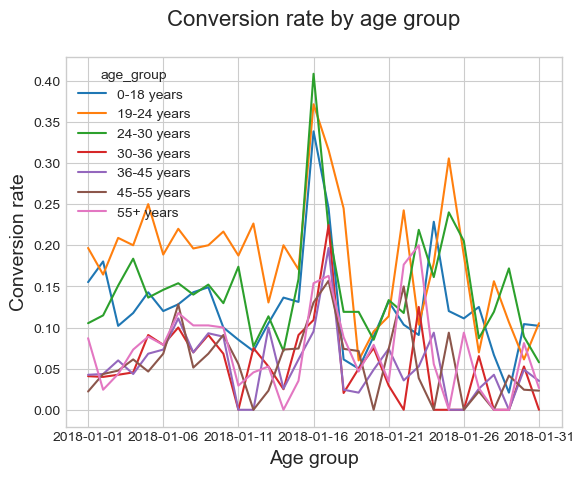

In [22]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing1, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualize conversion by age_group
age_group_df.plot(kind = 'line')
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

### Plotting Function

In [23]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()  
        plt.clf()

### Putting it all together

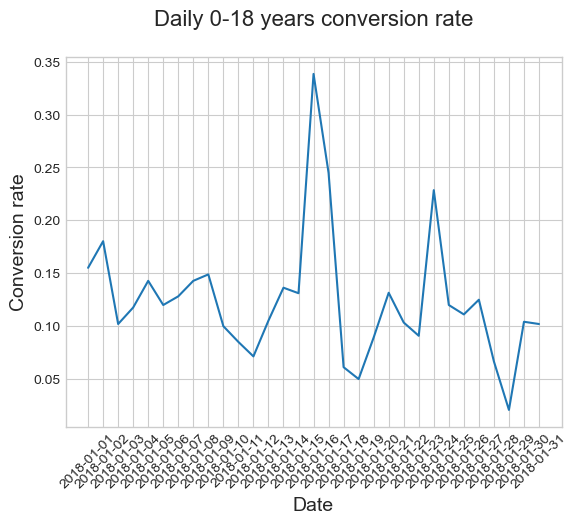

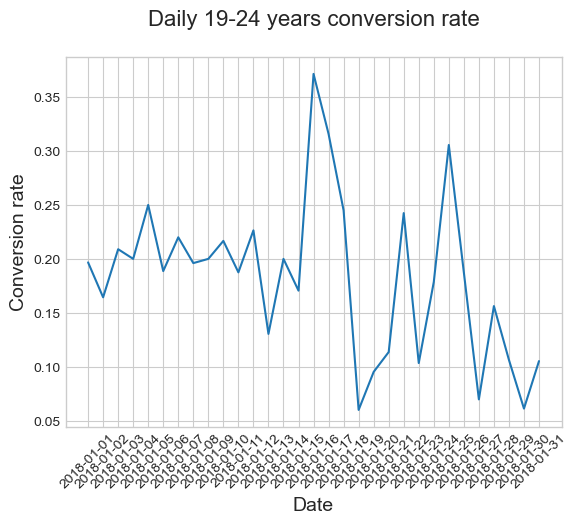

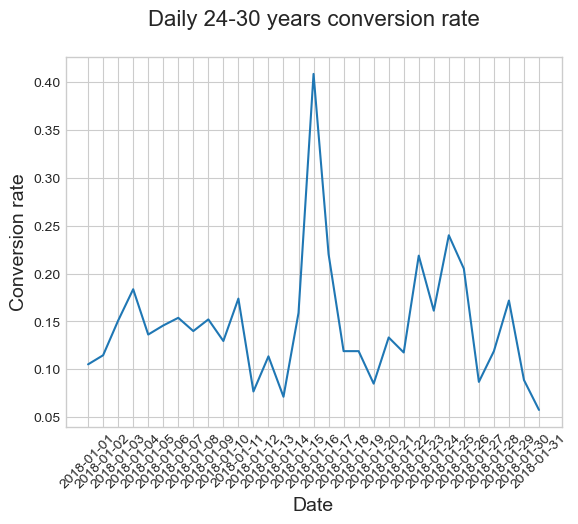

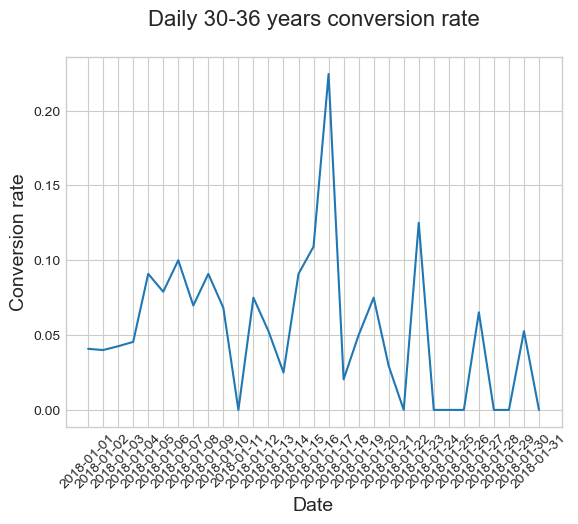

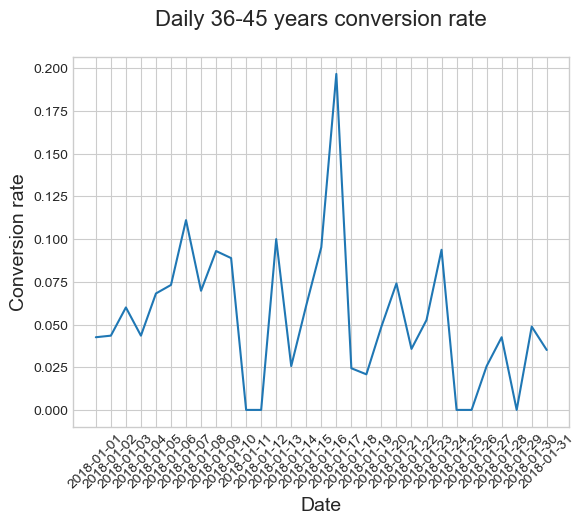

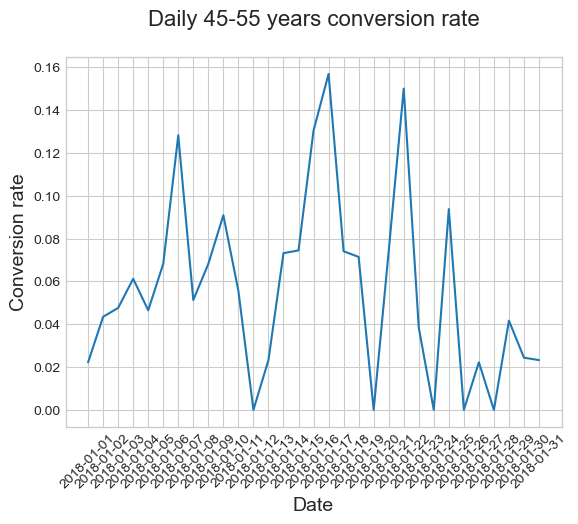

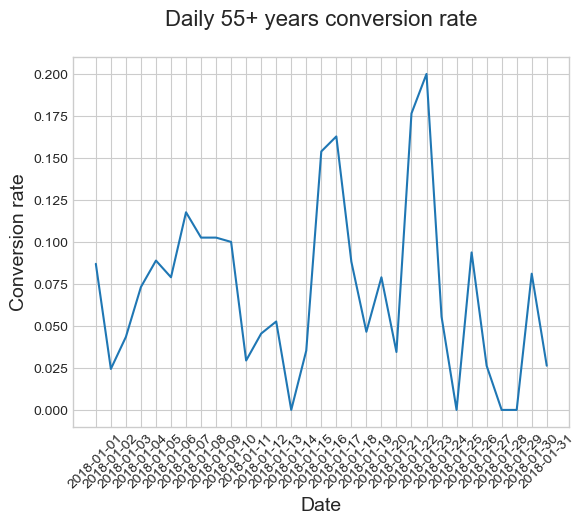

<Figure size 640x480 with 0 Axes>

In [24]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

### House ads conversion rate


In this exercise, you'll try out your ```conversion_rate()``` and ```plotting_conv()``` functions out on marketing looking at conversion rate by ```'date_served'``` and ```'marketing_channel'```.

In [25]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

display(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64

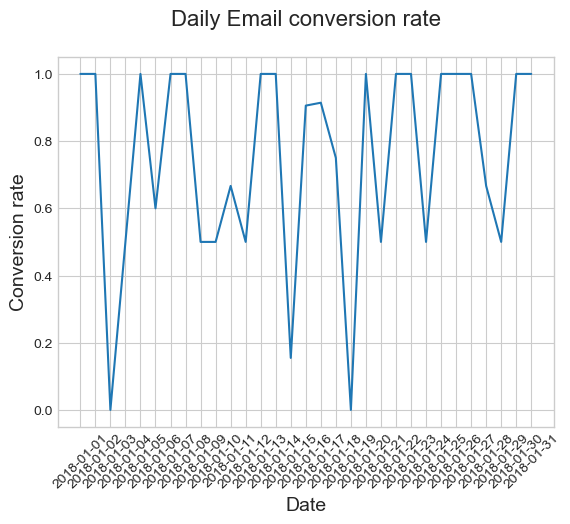

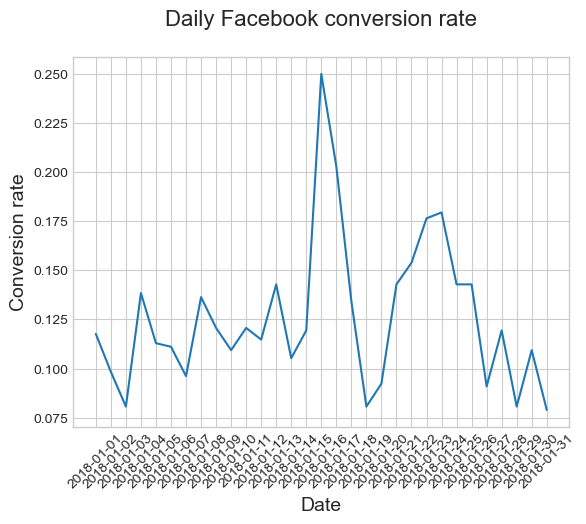

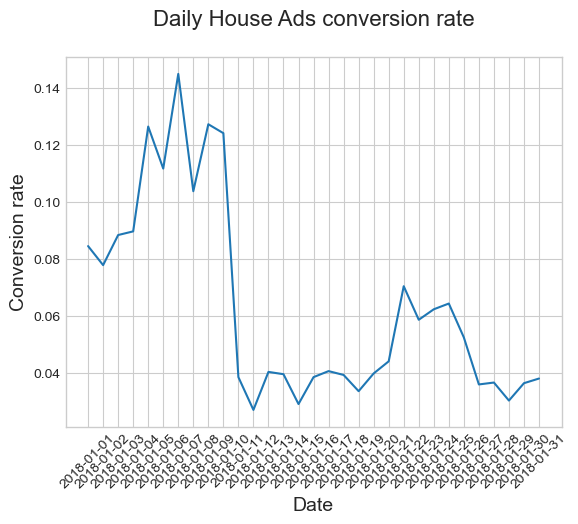

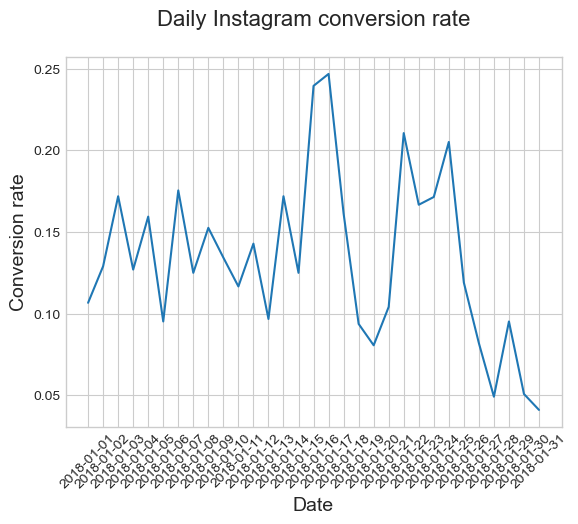

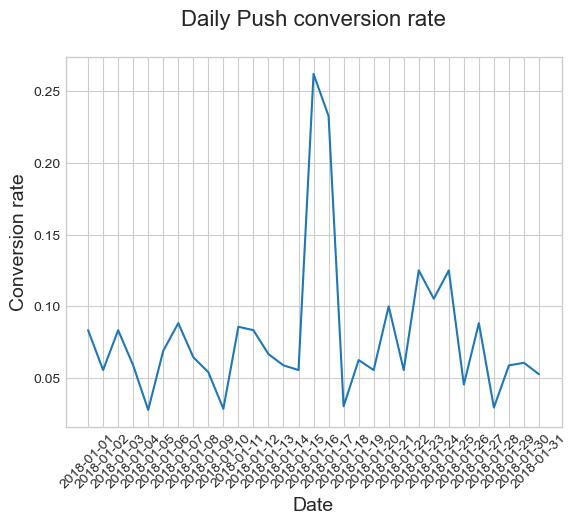

<Figure size 640x480 with 0 Axes>

In [26]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)


Sudden decrease in conversion rate around the middle of the month.

### Analyzing House ads conversion rate


In [27]:
# Convert to datetime first
marketing1['date_served'] = pd.to_datetime(marketing1['date_served'])

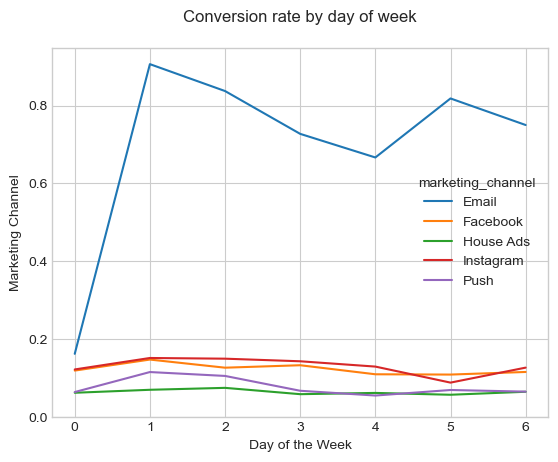

In [28]:
# Add day of week column to marketing
marketing1['DoW_served'] = marketing1['date_served'].dt.dayofweek
# marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing1, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot(kind = 'line')
plt.title('Conversion rate by day of week\n')
plt.xlabel('Day of the Week')
plt.ylabel('Marketing Channel')
plt.ylim(0)

plt.show()


### House ads conversion by language

Now that you've ruled out natural fluctuations across the day of the week a user saw our marketing assets as they cause for decreasing house ads conversion, you will take a look at conversion by language over time. Perhaps the new marketing campaign does not apply broadly across different cultures.

Ideally, the marketing team will consider cultural differences prior to launching a campaign, but sometimes mistakes are made, and it will be your job to identify the cause. Often data scientists are the first line of defense to determine what went wrong with a marketing campaign. It's your job to think creatively to identify the cause.

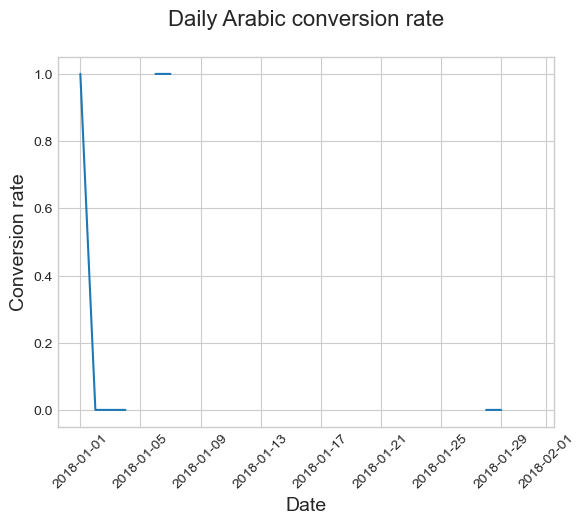

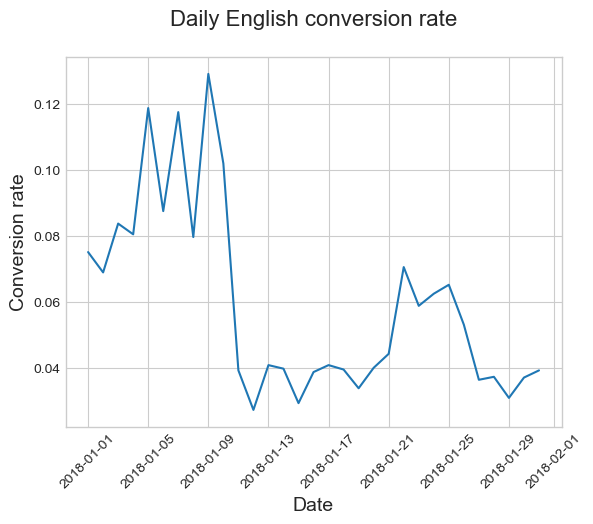

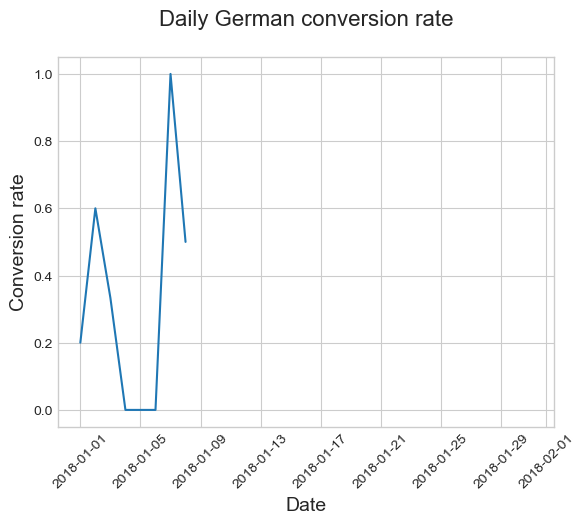

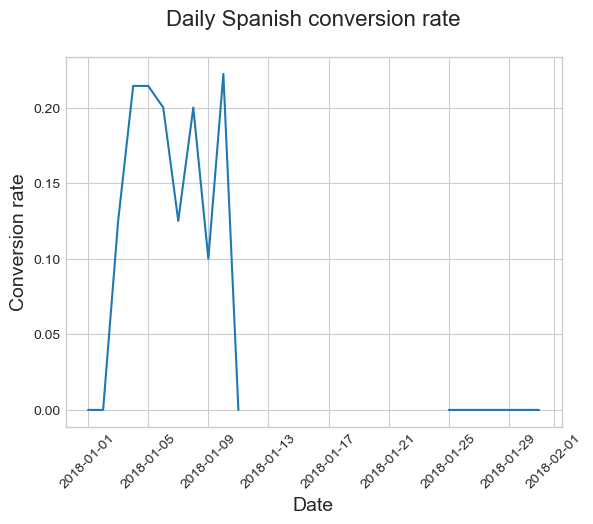

<Figure size 640x480 with 0 Axes>

In [29]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing1[marketing1['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

### Creating a DataFrame for house ads


The house ads team is concerned because they've seen their conversion rate drop suddenly in the past few weeks. In the previous exercises, you confirmed that conversion is down because you noticed a pattern around language preferences.

As a data scientist, it is your job to provide your marketing stakeholders with as specific feedback as possible as to what went wrong to maximize their ability to correct the problem. It is vital that you not only say "looks like there's a language problem," but instead identify what the problem is specifically so that the team doesn't repeat their mistake.

In [30]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


C:\Users\UserPC\AppData\Local\Temp\ipykernel_8456\696019586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


### Confirming house ads error

Now that you've created a DataFrame that checks whether users see ads in the correct language let's calculate what percentage of users were not being served ads in the right language and plot your results.

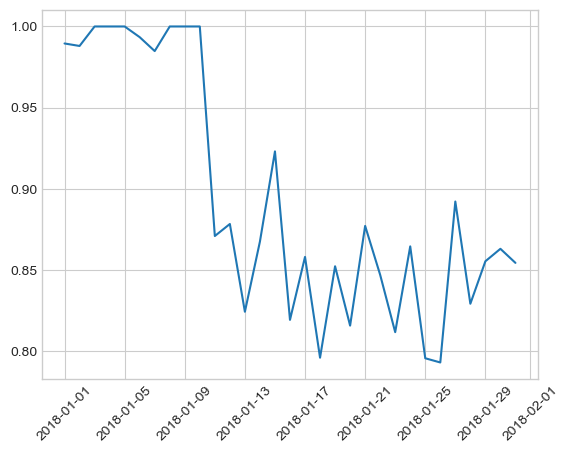

In [31]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index, language_check_df['pct'])

#Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

### Setting up conversion indexes

Now that you've determined that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In this exercise, you will index non-English language conversion rates against English conversion rates in the time period before the language bug arose.

In [32]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug,['language_displayed'])

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


### Analyzing user preferences

To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

In this step, you will create a new DataFrame that you can perform calculations on to determine the expected number of subscribers. This DataFrame will include how many users prefer each language by day. Once you have the DataFrame, you can begin calculating how many subscribers you would have expected to have had the language bug not occurred.


#### Instructions

- Group ```house_ads``` by ```date_served``` and ```language_preferred```.
- Use a dictionary within a call to ```.agg()``` to calculate the number of unique users and sums the number of converted users.
- Unstack ```converted``` at ```level = 1```

In [33]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

### Creating a DataFrame based on indexes
Now that you've created an index to compare English conversion rates against all other languages, you will build out a DataFrame that will estimate what daily conversion rates should have been if users were being served the correct language.

An expected conversion DataFrame named converted has been created for you grouping house_ads by date and preferred language. It contains a count of unique users as well as the number of conversions for each language, each day.

For example, you can access the number of Spanish-speaking users who received house ads using converted[('user_id','Spanish')].

#### Instructions

- Use ```.loc``` to create the column ```english_conv_rate``` in ```converted``` with the English conversion rate between ```'2018-01-11'``` and ```'2018-01-31'```.
- Create expected conversion columns for each language by multiplying ```english_conv_rate``` by each language index (```spanish_index```, ```arabic_index``` or ```german_index``).
- Multiply each language's expected conversion rate by the number of users who should have received house ads.

In [34]:
# Check the column names and structure
print(converted.columns)

Index(['user_id', 'converted'], dtype='object')


### Creating a DataFrame based on indexes
Now that you've created an index to compare English conversion rates against all other languages, you will build out a DataFrame that will estimate what daily conversion rates should have been if users were being served the correct language.

An expected conversion DataFrame named ```converted``` has been created for you grouping ```house_ads``` by ```date``` and ```preferred language```. It contains a count of unique users as well as the number of conversions for each language, each day.

For example, you can access the number of Spanish-speaking users who received house ads using ```converted[('user_id','Spanish')]```.

#### Instructions

- Use ```.loc``` to create the column ```english_conv_rate``` in converted with the English conversion rate between ```'2018-01-11'``` and ```'2018-01-31'```.
- Create expected conversion columns for each language by multiplying ```english_conv_rate``` by each language index (```spanish_index```, ```arabic_index``` or ```german_index```).
- Multiply each language's expected conversion rate by the number of users who should have received house ads.

In [35]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]/converted_df.loc['2018-01-11':'2018-01-31'][('user_id','English')]

# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']*converted_df['user_id','Spanish']/100
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']*converted_df['user_id','Arabic']/100
converted_df['expected_german_conv'] = converted_df['expected_german_rate']*converted_df['user_id','German']/100

### Assessing bug impact
It's time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language. Once the team has an estimate of the impact of this error, they can determine whether it's worth putting additional checks in place to avoid this in the future—you might be thinking, of course, it's worth it to try to prevent errors! In a way, you're right, but every choice a company makes requires work and funding. The more information your team has, the better they will be able to evaluate this trade-off.

The DataFrame ```converted``` has already been loaded for you. It contains expected subscribers columns for Spanish, Arabic and German language speakers named ```expected_spanish_conv```, ```expected_arabic_conv``` and ```expected_german_conv``` respectively.

#### Instructions

- Create the ```converted``` DataFrame by using .loc to select only rows where the date is between '2018-01-11' and '2018-01-31'.
- Sum the expected subscribers columns for each language in ```converted``` and store the results in ```expected_subs```
- Sum the actual subscribers for each language in ```converted``` and store the results in ```actual_subs```
- Subtract ```actual_subs``` from ```expected_subs``` to determine how many subscribers were lost due to the bug.

In [36]:
print(converted_df.columns)

MultiIndex([(              'user_id',  'Arabic'),
            (              'user_id', 'English'),
            (              'user_id',  'German'),
            (              'user_id', 'Spanish'),
            (            'converted',  'Arabic'),
            (            'converted', 'English'),
            (            'converted',  'German'),
            (            'converted', 'Spanish'),
            (    'english_conv_rate',        ''),
            ('expected_spanish_rate',        ''),
            ( 'expected_arabic_rate',        ''),
            ( 'expected_german_rate',        ''),
            ('expected_spanish_conv',        ''),
            ( 'expected_arabic_conv',        ''),
            ( 'expected_german_conv',        '')],
           names=[None, 'language_preferred'])


In [37]:
# Use .loc to slice only the relevant dates
converted_df = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df[('expected_spanish_conv')].sum() + converted_df[('expected_arabic_conv')].sum() + converted_df[('expected_german_conv')].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted', 'Arabic')].sum() + converted_df[('converted', 'German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

-25.495425075261792


In [38]:
# Use .loc to slice only the relevant dates
converted_df = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df[('expected_spanish_conv')].sum() + converted_df[('expected_arabic_conv')].sum() + converted_df[('expected_german_conv')].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted', 'Spanish')].sum() + converted_df[('converted', 'Arabic')].sum() + converted_df[('converted', 'German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

-25.495425075261792


# Chapter 4: A/B Testing

### Test allocation
The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

Before you begin analyzing the results, you will check to ensure users were allocated equally to the test and control groups.

#### Instructions

- Isolate the rows of marketing where the 'marketing_channel' is 'Email' and store the results in email.
- Group email by variant and sum the unique users and store the results in alloc.
- Plot the results of alloc in a bar chart.

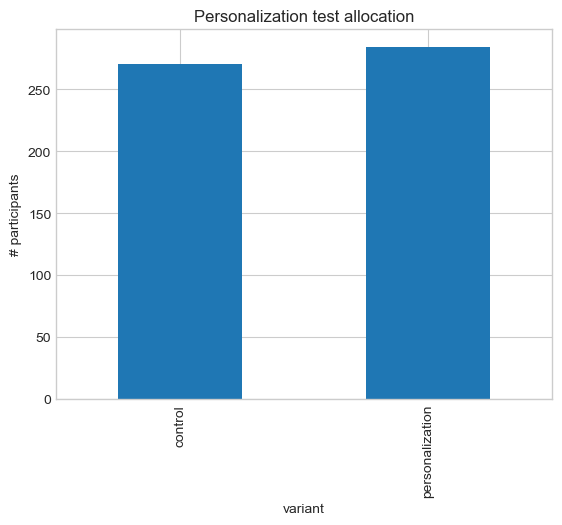

In [39]:
# Subset the DataFrame
email = marketing1[marketing1['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

### Comparing conversion rates
Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

The DataFrame email has been loaded in your workspace which contains only rows from the marketing DataFrame where marketing_channel is 'Email'.

#### Instructions

- Group the email DataFrame by user_id and variant while selecting the maximum value of the ```converted``` column and store the results in subscribers.
- Drop missing values from the ```control``` column of ```subscribers_df```
- Drop missing values from the ```personalization``` column of ```subscribers_df```
- Calculate the conversion rate for both ```personalization``` and ```control``` using the appropriate function for each.

In [45]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                            'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352
